# Assignment 1 - Sentiment analysis

## 0. Instructions

To complete the assignment please do the following  steps (all the three are requred to get the full credits): 

1. **Notebook**. Upload to Canvas a filled notebook with answers (this file). 
Please enter the questions inside this notebook where appropriate in the designated cells.

2. **Scripts**. In *Practical* part of this notebook you will be asked to implement different classifiers' architectures. Upload to Canvas your code which implements solutions to these parts in the form of *.py files (not *.ipynb notebooks) of the models:

  - ``classifier_lr.py`` -  an LR based classifier
  - ``classifier_ffnn.py`` - a FFNN based classifier
  - ``classifier_rnn.py`` - an RNN based classifier

These scripts should have the specific struction as it is shown in the baseline soultion [here](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/classifier.py). So, you should implement your ``train`` and ``classify`` functions (``pretrain`` if needed). Your model should be implemented as a special class/function in this script (be sure if you add any outer dependencies that everything is improted correctly and can be reproducable).

  Each of these Python classifiers will be renamed to "classifier.py" and automatically evaluated using the evaluate.py script. Please make sure that they did not contain any dependencies which are specific to your system.

  *Important*: to make sure everything works, please use ONLY the following software configuration (no matter which operating system you use): Anaconda 2020.07  distribution for Python 3.8 and PyTorch 1.3. The preferred way to install PyTorch is "conda install -c pytorch pytorch" and Torchtext is "conda install -c pytorch torchtext". There should be no additional libraries used: Anaconda already provides a sufficient number of them. If you need something just select from these available. Test for no the absence of dependencies by creating a virtual environment. 

3. **Shared task.** After the implementation of models' architectures you are asked to participate in the [competition](https://competitions.codalab.org/competitions/30517) to solve **Sentiment Analysis for IMDb Movie Review** task using your implemented code. 

You should use your classifier scripts from the previous part to train, validate, and generate predictions for the public and prevate test sets. For this you should use [``evaluate.py``](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/evaluate.py) script. It will produce predictions (preds.tsv) for the dataset and score them if the true labels are present. You can use these scores to evaluate your model on dev set and choose the best one. Be sure:

1. To download the [dataset](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/FILIMDB.tar.gz) and unzip it in the same folder where ``evaluate.py`` is.
2. to put your ``classifier.py`` and ``evaluate.py`` scripts in the same folder. 

The models can be trained on your local machines on CPU. However, if you work in Colab you can dowload data and scripts with ``wget`` command and run them from notebook cells. 

Upload obtained TSV file with your predictions (preds.tsv) in ``.zip`` for the best results on the dev set using LR, FFNN, and RNN  respectively to the public leaderboard of the competition. 

  *Important*: You have to upload predictions based on LR model in the sub-task for LR (https://competitions.codalab.org/competitions/25623), predictions based on FFNN model in the sub-task for FFNN (https://competitions.codalab.org/competitions/25623), and predictions based on RNN model in the sub-task for RNN (https://competitions.codalab.org/competitions/25623). So in each track there is a fair competition (only the same models are compared). Your scores will not be taken into account if you submit it in the wrong sub-task, e.g. LR preditions to FFNN or RNN sub-task!

Please, provide here in the notebook your user name in Codalab competition that we can recognize you in the leaderboard.


**YOUR USERNAME IN THE CODALAB LEADERBOARD:**

```

ENTER HERE

```

## 1. Theoretical part

This part contains some questions about the models and concepts.

### 1.1 Logistic Regression

Let us introduce the following notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size N, 

$x_{\{i\}} \in\mathbb{R}^M$ --- feature vector of the $i^{th}$ sample from train set, $M$ --- number of features, 

$y_{\{i\}} \in \{0, 1\}$ --- label (class) of the $i^{th}$ sample, 

$w\in\mathbb{R}^{M+1}$ --- weight vector in LogReg.

_**NB:**_ linear transofrmations on $x_{\{i\}}$ is as follows: 
$$
w_0 + w^Tx_{\{i\}} = w_0+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M},
$$

where $w_0$ stands for intercept term (bias).

For the convenience of implementation we will set $x_{\{i\},0} = 1$. In other words, we will add 1 to vectors $x_{\{i\}}$. Therefore, linear transformations will be the following:

$$w_0*1+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M} \equiv w^T[1;x_{\{i\}}]$$


1. Find the derivative of the sigmoid function $\sigma(z)$ and express it in terms of sigmoid, considering $z$ to be scalar 
$$ 
\sigma(z) = {\frac {1}{1+e^{-z}}}
$$

\begin{aligned}
\frac{d}{d z} \sigma(z) &=\frac{d}{d z}\left[\frac{1}{1+e^{-z}}\right] \\
&=\frac{d}{d z}\left(1+\mathrm{e}^{-z}\right)^{-1} \\
&=-\left(1+e^{-z}\right)^{-2}\left(-e^{-z}\right) \\
&=\frac{e^{-z}}{\left(1+e^{-z}\right)^{2}} \\
&=\frac{1}{1+e^{-z}} \cdot \frac{e^{-z}}{1+e^{-z}} \\
&=\frac{1}{1+e^{-z}} \cdot \frac{\left(1+e^{-z}\right)-1}{1+e^{-z}} \\
&=\frac{1}{1+e^{-z}} \cdot\left(\frac{1+e^{-z}}{1+e^{-z}}-\frac{1}{1+e^{-z}}\right) \\
&=\frac{1}{1+e^{-z}} \cdot\left(1-\frac{1}{1+e^{-z}}\right) \\
&=\sigma(z) \cdot(1-\sigma(z))
\end{aligned}

2. Prove that:  

$$ \sigma(-z) = 1 - \sigma(z)$$

LHS:
$$ \sigma(-z)=\frac{1}{1+e^{z}} $$
RHS:
$$ 1-\sigma(z)=1-\frac{1}{1+e^{-z}}=1-\frac{e^z}{e^z+1}=\frac{1}{e^z+1} $$

3. Write out the formula of hypothesis $h_w(x)$ for logistic regression.

$$ h_w(x)=\frac{1}{1+e^{-w_0-w^Tx}} $$

4. Plot the values of Binary Cross-Entropy error function for one sample from positve class and one sample from negative, depending on the logreg output $\hat y=h_w(x)$. What the loss function value will be equal to, given zero weights (right after the initialization)?
$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

In [ ]:
!wget https://drive.google.com/file/d/1xy8emkVUni8yZgUY17zr_juRTOJLN9Lq/view?usp=sharing

--2021-05-24 22:55:49--  https://drive.google.com/file/d/1xy8emkVUni8yZgUY17zr_juRTOJLN9Lq/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.138, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.1’

view?usp=sharing.1      [ <=>                ]  71.26K  --.-KB/s    in 0.03s   

2021-05-24 22:55:49 (2.58 MB/s) - ‘view?usp=sharing.1’ saved [72972]



In [ ]:
from IPython.display import Image
Image('photo.jpg')

5. Calculate gradient for cost function $\nabla_w L(w, x_{\{1\}},\ldots,x_{\{N\}})$ for binary (2 class) logistic regression. As evaluation function use cross-entropy with l2 regularization:
$$ L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N(y_{\{i\}} \log h_w(x_{\{i\}}) + (1 - y_{\{i\}}) \log (1 - h_w(x_{\{i\}}))) + \alpha\sum_{j=1}^M(w_j)^2$$

\begin{array}{c}
\frac{\partial L}{\partial w_{0}}=\frac{1}{N} \sum_{k=1}^{N} y_{k} \frac{-e^{-\left(w_{0}+\mathbf{w}^{T} \mathbf{x}_{k}\right)}}{1+e^{-\left(w_{0}+w^{2}\right.} x_{\left.k_{k}\right)}}+\left(1-y_{k}\right) \frac{e^{w_{0}+w^{T} x_{k}}}{1+e^{w_{0}+w^{T} x_{k}}}=\frac{1}{N} \sum_{k=1}^{N}\left(1-y_{k}\right) h_{w}\left(\mathbf{x}_{k}\right)-y_{k}\left(1-h_{w}\left(\mathbf{x}_{k}\right)\right)=\frac{1}{N} \sum_{k=1}^{N} h_{w}\left(\mathbf{x}_{k}\right)-y_{k} \\
\frac{\partial L}{\partial w_{i}}=\frac{1}{N} \sum_{k=1}^{N}\left[y_{k} \frac{-x_{k i} e^{-\left(w_{0}+w^{T} x_{k}\right)}}{1+e^{-\left(w_{0}+\mathbf{w}^{T} x_{k}\right)}}+\left(1-y_{k}\right) \frac{x_{k i} e^{w_{0}+w^{T} x_{k}}}{1+e^{w_{0}+w^{T} x_{k}}}\right]+2\alpha\sum_{j=1}^Mw_j=\frac{1}{N} \sum_{k=1}^{N}\left[x_{k i}\left(1-y_{k}\right) h_{w}\left(\mathbf{x}_{k}\right)-x_{k i} y_{k}\left(1-h_{w}\left(\mathbf{x}_{k}\right)\right)\right]+2\alpha\sum_{j=1}^Mw_j= \\
=\frac{1}{N} \sum_{k=1}^{N}\left[\left(h_{w}\left(\mathbf{x}_{k}\right)-y_{k}\right) x_{k}\right]+2\alpha\sum_{j=1}^Mw_j
\end{array}

_**NB:**_ Regularization component $\sum_{j=1}^M(w_j)^2$ does not incluse $w_0$, as it is responsible for overall shift only. It may be of any value, whereas $L_2$ regularization seeks to minimmize $w_i$ values.

6. Write out the formula for the update of vector $w$ with parameters using stochastic gradient descent optimization

$$ w_{i+1} = w_{i} - \eta \nabla_{w}L $$

7. Prove that binary cross-entropy evaluation function for binary logistic regression has the only one minimum

For convex function any minimum is a global minimum. The function is convex as its Hessian matrix (matrix of second-order derivatives) is positive semi-definite for all possible values of w.


8. Show that minimization of Binary Cross Entropy loss function for logistic regression is equivalent to the following function (sum over samples and regularization component is omitted):
$$ softplus(-tw^Tx),$$

where

$$
softplus(x)=log(1+e^x)$$

$$t=2y-1 \in \{-1+1\}$$


### 1.2 Feed-forward Neural Network

Let use the fllowing notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size $N$

$x_{\{i\}} \in\mathbb{R}^M$, where $i$ is the review index, 

$M=s^{(0)}$ --- number of features or dictionary size, 

$y_{\{i\}} \in \{0, 1\}$, $s^{(l)}$ - number of neurons in the layer $l$, 

$W^{(l)}$ --- parameter matrix of $l^{th}$ layer of size $s^{l} \times (s^{l-1}+1)$ (as we add bias), where

$l=\{1,2,\cdots,L\}$, $L$ --- number of layers (number of hidden layers is equal to $L-1$)


Feed-forward Neural Network example with two layers (one hidden layer):

![img](http://panchenko.me/figures/nn.jpg)


Feed-forward propagation:

$a^{(0)} = x_{\{i\}} $

$z^{(1)} = W^{(1)} [1, a^{(0)}] $

$a^{(1)} = tanh(z^{(1)})$

$z^{(2)} = W^{(2)}[1, a^{(1)}] $

$a^{(2)} = softmax(z^{(2)}) $


Backpropagation:
...

1. Calculate the derivative for $\tanh(z)$ function and express it in terms of $tanh(z)$, considering $z$ to be a scalar. Transform your answer, so that the exponent will be used only once while computing $\tanh(z)$ and its derivative.
$$ \tanh(z) = {\frac {e^{z}-e^{-z}}{e^{z}+e^{-z}}}$$


\begin{aligned}
\frac{d}{d z}\left(\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}\right) &=\frac{e^{z}+e^{-z}}{\left(e^{z}+e^{-z}\right)^{2}} d\left(e^{z}-e^{-z}\right)-\frac{e^{z}-e^{-z}}{\left(e^{z}+e^{-z}\right)^{2}} d\left(e^{z}+e^{-z}\right) \\
&=\frac{\left(e^{z}+e^{-z}\right)\left(e^{z}+e^{-z}\right)}{\left(e^{z}+e^{-z}\right)^{2}}-\frac{\left(e^{z}-e^{-z}\right)\left(e^{z}-e^{-z}\right)}{\left(e^{z}+e^{-z}\right)^{2}} \\
&=\frac{\left(e^{z}+e^{-z}\right)^{2}-\left(e^{z}-e^{-z}\right)^{2}}{\left(e^{z}+e^{-z}\right)^{2}} \\
&=1-\left(\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}\right)^{2} \\
&=1-\tanh (z)^{2}
\end{aligned}

2. Write out the cross entropy loss function $L(W^{(1)}, \ldots, W^{(L)},x_{\{1\}},\ldots,x_{\{N\}})$ for neural network with one hidden layer ($L=2$), and then generalize it for neural network with $L-1$ hidden layers and for multiclass classification (with $K$ classes). Use $\tanh(z)$ activation function for hidden layer,  $softmax(z)$ for output layer.

\begin{array}{c}
\mathbf{a}_{i}^{0}=\mathbf{x}_{i} \in \mathbb{R}^{d} \\
\mathbf{z}_{i}^{1}=W^{1} \mathbf{a}_{i}^{0} \\
\mathbf{a}_{i}^{1}=\tanh \mathbf{z}_{i}^{1} \in \mathbb{R}^{h} \\
\mathbf{z}_{i}^{2}=W^{2} \mathbf{a}_{i}^{0} \in \mathbb{R}^{K} \\
\mathbf{p}_{i}=\operatorname{softmax}\left(\mathbf{z}_{i}^{2}\right) \\
\mathcal{L}\left(W^{1}, W^{2}, \mathbf{x}_{1}, \ldots, \mathbf{x}_{N}\right)=\frac{1}{N} \sum_{i=1}^{N} \sum_{j=0}^{K-1}\left[y_{i}=j\right] \log p_{i j}
\end{array}

3. Demonstrate that $softmax(z+c)=softmax(z)$, where ${c}$ -- vector with equal components

$$ softmax(\mathbf{z}+\mathbf{c})_{i}=\frac{e^{z_{i}+c}}{\sum_{j=1}^{k} e^{z_{j}+c}}=\frac{e^{z_{i}} \cdot e^{c}}{\sum_{j=1}^{k} e^{z_{j}} \cdot e^{c}}=softmax(\mathbf{z})_{i} $$

4. How many parameters does the neural network have? Inputs vectors size is $M$, output vectors size is $K$ and the number of neurons is $H$.

MH+HK parameters for network with one hidden layer of dimensionality H.

5. Provide the formula for the $\delta^{(L)}$ --- gradient of loss function based on pre-activation on the last layer. $z^{(L)}$.

$ \begin{array}{c}
\delta^{(L)}=\frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial \mathcal{L}}{\partial a^{(L)}} \\
a^{(L)}=\operatorname{softmax}\left(z^{(L)}\right) \\
\operatorname{softmax}\left(x_{i}\right)=\frac{e^{x_{i}}}{\sum_{j=1}^{n} e^{x_{j}}} \\
\frac{\partial}{\partial x_{k}} \operatorname{softmax}\left(x_{i}\right)=\left\{\begin{array}{ll}
\operatorname{softmax}\left(x_{i}\right)\left(1-\operatorname{softmax}\left(x_{i}\right)\right), & \text { if } i=k \\
\operatorname{softmax}\left(x_{i}\right) \operatorname{softmax}\left(x_{k}\right), & \text { if } i \neq k
\end{array}\right.
\end{array} $

6. Provide the formula for $\delta^{(l)}$ --- gradient of loss function on $z^{(l)}$ through $\delta^{(l+1)}$.

\begin{array}{c}
a^{(l)}=g^{(l)}\left(z^{(l)}\right) \\
z^{(l+1)}=W^{(l+1)} a^{(l)}+b^{(l+1)} \\
\frac{\partial \mathcal{L}}{\partial a^{(l)}}=\frac{\partial z^{(l+1)}}{\partial a^{(l)}} \delta^{(l+1)}=\left\{W^{(l+1)}\right\}^{T} \delta^{(l+1)} \\
\delta^{(l)}=\frac{\partial a^{(l)}}{\partial z^{(l)}}\left\{W^{(l+1)}\right\}^{T} \delta^{(l+1)}
\end{array}

7. Provide the formula for $\nabla_{W^{(l)}} L$ --- gradient of loss function on weights $W^{(l)}$, using $\delta^{(l)}$.

$$ \nabla_{W^{(l)}} \mathcal{L}=\frac{\partial z^{(l)}}{\partial W^{(l+1)}} \delta^{(l)} $$

### 1.3 Word Embeddings

1. Write down objective functions of the Skip-Gram word embedding models assuming negative sampling (SGNS).

\begin{aligned}
\mathcal{L}(\theta) &=\log P(+\mid t, c)+\sum_{i=1}^{k} \log P\left(-\mid t, n_{i}\right)=\\
&=\log \sigma(c \cdot t)+\sum_{i=1}^{k} \log \sigma\left(-n_{i} \cdot t\right)
\end{aligned}

2. Write down derivatives with respect to the parameters (weights) of this loss function.

```

PLEASE ENTER HERE YOUR ANSWER 

```

### 1.4 Recurrent Neural Networks

#### 1.4.1 Computing probability

Consider a sequence $x_1, x_2, ..., x_T$, where $x_i$ is an index of token in the vocabulary $V$ and a two-layer language model based on the LSTM neural network. Let's assume that this network generates an estimation $\hat{y_i}[w] = \hat{P}(x_1, ..., x_{i-1})$ of probability that token $w$ follows the sequence of tokens $x_1, ..., x_{i-1}$. 

1. Write formulas for the forward pass of this network: how to estimate the $\hat{y_i}[w] = \hat{P}(x_1, ..., x_{i-1})$? For simplicity, write first formulas for the individual layers, then use them to write the full formula for the forward pass.


\begin{array}{c}
h_{i}=g\left(U h_{i-1}+W w\right) \\
\hat{y}_{i}=f\left(V h_{i}\right)
\end{array}

2. How to estimate the probability of a sequence of tokens $x_1, x_2, ..., x_T$ ie what is the probability of $\hat{P}(x_1,...,x_T)$?

1) Initialize RNN hidden state 
$h_0$ and weights $U, W, and$  $V$.

2) Apply RNN sequentially to tokens $x_1, x_2, ..., x_T$ to estimate conditional probabilities from the formula above.

3) Multiply resulting estimates.

#### 1.4.2 Vanishing gradient problem



What is the vanishing / exploiding gradient problem in Elman recurrent neural networks? Write down update equations for Elman RNN and explain what is causing the vanishing / exploiding gradient issue.

\begin{array}{c}
h_{i}=g\left(U h_{i-1}+W x_{i}\right) \\
y_{i}=f\left(V h_{i}\right)
\end{array}

If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient.

How does LSTM help prevent the vanishing (and exploding) gradient problem in a recurrent neural network? Write down the equations of LSTM and explain how technically this schema is better than the Elman recurrent neural networks.

\begin{array}{c}
\mathbf{z}^{t}=g\left(W_{\mathbf{z}} \mathbf{x}^{t}+R_{\mathbf{z}} \mathbf{y}^{t-1}+\mathbf{b}_{\mathbf{z}}\right) \\
\mathbf{i}^{t}=\sigma\left(W_{i} \mathbf{x}^{t}+R_{i} \mathbf{y}^{t-1}+p_{i} \odot \mathbf{c}^{t-1}+\mathbf{b}_{i}\right) \\
\mathbf{f}^{t}=\sigma\left(W_{f} \mathbf{x}^{t}+R_{f} \mathbf{y}^{t-1}+p_{f} \odot \mathbf{c}^{t-1}+\mathbf{b}_{f}\right) \\
\mathbf{c}^{t}=\mathbf{z}^{t} \odot \mathbf{i}_{t}+\mathbf{c}^{t-1} \odot \mathbf{f}_{t} \\
\mathbf{o}^{t}=\sigma\left(W_{o} \mathbf{x}^{t}+R_{o} \mathbf{y}^{t-1}+p_{o} \odot \mathbf{c}^{t-1}+\mathbf{b}_{o}\right) \\
\mathbf{y}_{t}=h\left(\mathbf{c}^{t}\right) \odot \mathbf{o}^{t}
\end{array}

LSTM decouples cell state (typically denoted by c ) and hidden layer/output (typically denoted by h ), and only do additive updates to c , which makes memories in c more stable. Thus the gradient flows through c is kept and hard to vanish (therefore the overall gradient is hard to vanish).

The LSTM architecture makes it easier for the RNN to preserve information over many timesteps
–e.g. if the forget gate is set to remember everything on ever timestep, then the info in the cell is preserved indefinitely.

LSTM doesn’t guarantee that there is no vanishing/exploding gradient, but it does provide an easier way for the model to learn long-term dependencies.

## 2. Practical part





The goal of this part is to implement text classifiers based on logistic regression (LR), feed-forward neural netword (FFNN) or recurrent neural network (RNN) where pre-trained word embeddings are used as features. For LR and FFNN you need to simply average word embeddings of a sentence (perform average pooling of word vectors) and they apply the LR/FFNN to the output representation. In case of RNN you feed one embedding per input token.

### 2.1 Logistic Regression

2.1.1 Implementation of the model 

The goal of this section to implement using **pytorch** a text categorization model using logistic regression. Following the steps below, you can complete corresponding parts in your ``classifier_lr.py`` script and apply the code for sentiment classification task. 

**Important**: You are not expected to implement logistic regression training from scratch in this (updated) version of the task to get full scores. You are free to use optimization package of pytorch. The implementations in this assignment could and should be based on the models from the second and third seminars (and their variants by you). 

To implement the model, you can follow the steps below. 

1. Load the dataset, preprocess and tokenize it. Build a dictionary with unique tokens from the train set.

2. To train our logistic regression, our train and test data should be converted to matrices of size $N * M$ ($N$ -- number of reviews, $M$ -- feature). You can use either bag-of-words feature representation, in this case features are words or you can use word embeddings as the initial embedding matrix. In the latter case, first, load embeddings from the disk, then select the correct subset of embeddings for the words that are actually present in the data, and finally setting the Embedding layer’s weight matrix as the loaded
subset.

3. Add a sigmoid function.

4. Initialization. Write weights initialization function.

5. Forward pass. Write a function that compute the objective function of logistic regression.

6. Training loop. Write the function that makes a gradient descent. It is recommended to use mini-batch gradient descent: split your train data to mini-batches (100-500) samples, on each iteration calculate the gradient not for all train set, but on the current batch only. It will speed up one iterqtion computation time and the model will converge faster.
 

In [ ]:
!wget https://github.com/skoltech-nlp/filimdb_evaluation/raw/master/FILIMDB.tar.gz
!tar -zxvf FILIMDB.tar.gz
!mv -t . FILIMDB/*
!rm -rf FILIMDB
!pip install transformers -qq

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, precision_score, recall_score, f1_score
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch import optim
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from IPython.display import display, clear_output
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
np.random.seed(42)
torch.manual_seed(42)

from typing import List, Any
from time import time
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess(document):
    document = document.lower()   
    words = tokenizer.tokenize(document)   
    words = [w for w in words if w not in stop_words]    
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:    
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [ ]:
train_texts = pd.read_csv("train.texts", sep="\n", header=None)
train_labels = pd.read_csv("train.labels", sep="\n", header=None)
train = pd.concat([train_texts, train_labels], ignore_index=True, axis=1)
train.columns = ["text", "label"]

dev_texts = pd.read_csv("dev.texts", sep="\n", header=None)
dev_labels = pd.read_csv("dev.labels", sep="\n", header=None)
dev = pd.concat([dev_texts, dev_labels], ignore_index=True, axis=1)
dev.columns = ["text", "label"]

dev_b_texts = pd.read_csv("dev-b.texts", sep="\n", header=None)
dev_b_labels = pd.read_csv("dev-b.labels", sep="\n", header=None)
dev_b = pd.concat([dev_b_texts, dev_b_labels], ignore_index=True, axis=1)
dev_b.columns = ["text", "label"]

test = pd.read_csv("test.texts", sep="\n", header=None)
test.columns = ["text"]
test_b = pd.read_csv("test-b.texts", sep="\n", header=None)
test_b.columns = ["text"]

train["preprocessed text"] = train["text"].apply(preprocess)
test["preprocessed text"] = test["text"].apply(preprocess)
dev["preprocessed text"] = dev["text"].apply(preprocess)
test_b["preprocessed text"] = test_b["text"].apply(preprocess)
dev_b["preprocessed text"] = dev_b["text"].apply(preprocess)

all_texts = pd.concat([train["preprocessed text"], test["preprocessed text"], dev["preprocessed text"], test_b["preprocessed text"], dev_b["preprocessed text"]])
all_texts_splitted = list(map(lambda x: x.split(" "), all_texts))

train_labels_txt = train["label"].values
dev_labels_txt = dev["label"].values
dev_b_labels_txt = dev_b["label"].values

test_b_txt = test_b["preprocessed text"].values
train_txt = train["preprocessed text"].values
dev_txt = dev["preprocessed text"].values
test_txt = test["preprocessed text"].values
dev_b_txt = dev_b["preprocessed text"].values

label_pipeline = lambda x: 1 if x == "pos" else 0

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
MAX_LEN = 256

In [ ]:
from classifier_lr import UnsafeDataset

In [ ]:
train_dataset = classifier_lr.UnsafeDataset(tokenizer(train_txt.tolist(),
                                        max_length=64,
                                        truncation=True,
                                        padding='longest'), train_labels_txt.tolist())

eval_dataset = classifier_lr.UnsafeDataset(tokenizer(dev_b_txt.tolist(),
                                       max_length=64,
                                       truncation=True,
                                       padding='longest'), dev_b_labels_txt.tolist())

test_dataset = classifier_lr.UnsafeDataset(tokenizer(test_txt.tolist(),
                                       max_length=64,
                                       truncation=True,
                                       padding='longest'), test_b_txt.tolist())

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
from classifier_lr import LogRegModel

In [ ]:
vocab_size = tokenizer.vocab_size
n_classes = 2
emb_dim = 128
model = classifier_lr.LogRegModel(vocab_size, n_classes, emb_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.get_device_name())
else:
    print("cpu")

In [ ]:
save_path = "/content/drive/MyDrive/HW1/lr.pth"
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

In [ ]:
from classifier_lr import train_model_epoch, val_model_epoch

In [ ]:
exp_name = datetime.now().isoformat(timespec='seconds')
writer = SummaryWriter(log_dir=f'logs/{exp_name}')
N_EPOCHS = 40
begin = 0

for epoch in tqdm_notebook(range(N_EPOCHS)):
    print("training...")
    loss, metrics, begin = classifier_lr.train_model_epoch(model, optimizer, criterion, train_dataloader, writer, begin)
    print(f"training loss: {loss:.2e}")
    print("evaluating...")
    metrics = classifier_lr.val_model_epoch(model, eval_dataloader, writer)
    torch.save(model.state_dict(), save_path)
    

In [ ]:
metrics

#### 2.1.2 Learning rate 

Set up the learning rate equal to **1e-3**, regularizer coefficient of $L_2$ equal to  $\alpha$=**1e-5**. Train logistic regression on train set. Build the plots for the loss function values and accuracies on train and validation sets during training.

To plot this curves use matplotlib library ([very short](http://cs231n.github.io/python-numpy-tutorial/#matplotlib) и [not so very short](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) tutorials). Your may draw these plots in Jupyter notebook as well (see [example](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part\%203\%20-\%20Plotting\%20with\%20Matplotlib.ipynb)). 


_Question: plot the training curves. In how many epoch does yout algorithm converge? What accuracy do you get on train, dev and test sets? Do you observe underfitting or overfitting?_

```

PLEASE ENTER HERE YOUR ANSWER 

```

Try to set different learning rates.

*Question: Plot different training curves for different learning rate parameters. Which conclusions could be made on this?*

```

PLEASE ENTER HERE YOUR ANSWER 

```

#### 2.1.3 Regularization 

For $\alpha$ coefficient of $L_2$ regularizer we used a random value. Wrong/inappropriate $\alpha$ causes underfitting ($\alpha$ is too large) or overfitting ($\alpha$ is too small). Choose the appropriate $\alpha$ that helps to perform better on validation set. Be careful: $\alpha$ changes the objective fiunction, so it is possible that the learning rate and the number of epochs should be changed too. Use plots to choose the appropriate values!

_Question: plot training curves for several $\alpha$ values. What conclusions could be made? How many epochs and which learning rate do you need until it converges? How long does it take to train and to label test data?_

```

PLEASE ENTER HERE YOUR ANSWER 

```

### 2.2 Feed-forward Neural Network



The goal of this section to implement using **pytorch** a text categorization model using Feed-forward Neural Network. Following the steps below, you can complete corresponding parts in your ``classifier_ffnn.py`` script and apply the code for sentiment classification task.

1. Repeat the steps 2.1.1 - 2.1.2 from the Logistic regression subsection.

2. Implement Feed-forward Neural Network with **one** hidden layer using **pytorсh**.

3. Similarly to 2.1.10 and 2.1.11, do the finetuning for the learning rate and $\alpha$ coefficient of $L_2$ regularizer hyperparameters on validation set.


_Question: plot learning curves for different $\alpha$. What is the optimal value of $\alpha$? of learning rate? How many epoch does it take to converge?_


```

PLEASE ENTER HERE YOUR ANSWER 

```

Using $\alpha$ and learning rate from 2.2.3 train the classifier on the whole train set. 

### 2.3 Recurrent Neural Networks

The goal of this section to implement using **pytorch** a text categorization model using Recurrent Neural Networks. Following the steps below, you can complete corresponding parts in your ``classifier_rnn.py`` script and apply the code for sentiment classification task. Choose between all proposed configuration that one that gives you the best validation score and implement it for the final submission.

#### 2.3.1 Use LSTM and word embeddings for text classification 


Implement a text classifier based on Bi-LSTM network. Use hidden state(s) to represent an input text document.  If you use ``torch`` use the ``torch.nn.Embedding`` to load pre-trained word embeddings. Use the [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip) embeddings in the input layer of your network.

#### 2.3.2 Use LSTM and ELMo for text classification 

Use ``allennlp`` and the model ``elmo_2x2048_256_2048cnn_1xhighway_weights`` which is the model used in week5 seminar to build a text classification system. The only difference from the previous point is the use of ELMo contextualized word embeddings. Do not use any additional dependencies or versions of the ELMo model. Make sure that the model is located in the same directory with the classification Python script.

#### 2.3.3 Use of document embeddings for text classification 



Use ``gensim`` to obtain document embeddings for all reviews. Build a model based on logistic regression using ``sklearn`` which load these embeddings for each document and performs a classification. 

_Discuss: with which configuration have you achieved the best score? What was the results? What is your opinion -- why some model has performed worse and some better?_

```

PLEASE ENTER HERE YOUR ANSWER 

```

## 3. Research part

### 3.1 Logistic Regression

Apart form classical gradient descent approach there are a lot of SGD variations, such as Adam, Adagrad, RMSProp, that are frequently used in the real-word cases. ([short](http://cs231n.github.io/neural-networks-3/#update) and [long](http://ruder.io/optimizing-gradient-descent/index.html#momentum) reviews on these approaches). The key thing about those approaches: apart from the gradients they use second derivative (momentum) for the next step.


1. Implement Momentum or Adagrad and use it to train your logreg. Draw several plots for training with different hyperparameter values. What can be observed from the results and what conclusions could be made?

In [ ]:
def sgd_momentum(variables, gradients, config, state):  
    state.setdefault('accumulated_grads', {})
    
    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            
            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))
            
            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)
            
            current_var -= old_grad
            var_index += 1 

2. In order to improve classification  performance it is important to understand why and where the classifier makes mistakes. Find some examples, define, which features lead to the errors (e.g., in positive reviews $w^Tx_{\{i\}}$ they are used with mostly negative weights making the scalar product negative and wrong classification as the result). Are there any common features or tendencies in the errors found? If so, tell which steps could be made to improve the classifier?

```

PLEASE ENTER HERE YOUR ANSWER 

```

3. As bag-of-word vector component other different features may be used: absolute word counts, relative counts, binary features (whether the word appears in text), etc. We can transform each feature somehow: take logarithm, transform that each feature would belong to the [0, 1] range or normalize (substract mean value and divide by std). Try different approaches and describe the results.

```

PLEASE ENTER HERE YOUR ANSWER 

```

### 3.2 Feed-forward Neural Network

1. Try to improve your neural classifier performance expermenting with model architecture (change number of layers and their sizes). Draw the training curves (loss and accuracy) showing dependency of 1) layer size 2) number of layers. According to your experiments, which structure should be considered as the most efficient?

```

PLEASE ENTER HERE YOUR ANSWER 

```

2. Try other gradient descent algorithms to your model (e.g. Adam, Adagrad, RMSProp).

```

PLEASE ENTER HERE YOUR ANSWER 

```

### 3.4 Recurrent Neural Networks

#### 3.4.1 Different types of embeddings


Compare performance of [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip), [word2vec](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) models to the model which has randomly initialized embedding layer (no pre-traied embeddings are used). Plot the results depending on the type of used embeddings. 

```

PLEASE ENTER HERE YOUR ANSWER 

```

#### 3.4.2 Impact of hyper-parameter choice

Try different numbers of hidden layers, LSTM cells used in each layers, learning rates, and other meta-parameters. Present plots which demonstrate performance of the model depending of values of these meta-parameters. Does bi-directional LSTM works better than uni-directioanl LSTM for this task? 


```

PLEASE ENTER HERE YOUR ANSWER

```


## 4. Bonus practical part: using BERT for text categorization



This additional task can yield you extra points. In this task, you will need to create a sentiment text categorization model using a transformer-based pre-trained language model such BERT, ELECTRA, RoBERTa, etc. 

To complete the task you need to complate two tasks below.


###4.1 Text classifier

Write in the cell below the complete executable code of your solution (you do not need to provide the ``classifier.py`` script in this case. 

1. Please enter your code below.
2. Perform the required downloads of the data for training of the model and generation of the TSV file.
3. Your model has to be trained and generate the file for the Colab susbmission.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://github.com/skoltech-nlp/filimdb_evaluation/raw/master/FILIMDB.tar.gz
!tar -zxvf FILIMDB.tar.gz
!mv -t . FILIMDB/*
!rm -rf FILIMDB
!pip install transformers -qq

--2021-05-24 22:56:13--  https://github.com/skoltech-nlp/filimdb_evaluation/raw/master/FILIMDB.tar.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/skoltech-nlp/filimdb_evaluation/master/FILIMDB.tar.gz [following]
--2021-05-24 22:56:13--  https://raw.githubusercontent.com/skoltech-nlp/filimdb_evaluation/master/FILIMDB.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53759460 (51M) [application/octet-stream]
Saving to: ‘FILIMDB.tar.gz’

FILIMDB.tar.gz      100%[===================>]  51.27M   102MB/s    in 0.5s    

2021-05-24 22:56:15 (102 MB/s) - ‘FILIMDB.tar.gz’ saved [53759460/537

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, precision_score, recall_score, f1_score
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch import optim
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from IPython.display import display, clear_output
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
np.random.seed(42)
torch.manual_seed(42)

from typing import List, Any
from time import time
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower()   
    words = tokenizer.tokenize(document)   
    words = [w for w in words if w not in stop_words]    
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:    
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_texts = pd.read_csv("train.texts", sep="\n", header=None)
train_labels = pd.read_csv("train.labels", sep="\n", header=None)
train = pd.concat([train_texts, train_labels], ignore_index=True, axis=1)
train.columns = ["text", "label"]

dev_texts = pd.read_csv("dev.texts", sep="\n", header=None)
dev_labels = pd.read_csv("dev.labels", sep="\n", header=None)
dev = pd.concat([dev_texts, dev_labels], ignore_index=True, axis=1)
dev.columns = ["text", "label"]

dev_b_texts = pd.read_csv("dev-b.texts", sep="\n", header=None)
dev_b_labels = pd.read_csv("dev-b.labels", sep="\n", header=None)
dev_b = pd.concat([dev_b_texts, dev_b_labels], ignore_index=True, axis=1)
dev_b.columns = ["text", "label"]

test = pd.read_csv("test.texts", sep="\n", header=None)
test.columns = ["text"]
test_b = pd.read_csv("test-b.texts", sep="\n", header=None)
test_b.columns = ["text"]

train["preprocessed text"] = train["text"].apply(preprocess)
test["preprocessed text"] = test["text"].apply(preprocess)
dev["preprocessed text"] = dev["text"].apply(preprocess)
test_b["preprocessed text"] = test_b["text"].apply(preprocess)
dev_b["preprocessed text"] = dev_b["text"].apply(preprocess)

all_texts = pd.concat([train["preprocessed text"], test["preprocessed text"], dev["preprocessed text"], test_b["preprocessed text"], dev_b["preprocessed text"]])
all_texts_splitted = list(map(lambda x: x.split(" "), all_texts))

train_labels_txt = train["label"].values.tolist()
dev_labels_txt = dev["label"].values.tolist()
dev_b_labels_txt = dev_b["label"].values.tolist()

test_b_txt = test_b["preprocessed text"].values.tolist()
train_txt = train["preprocessed text"].values.tolist()
dev_txt = dev["preprocessed text"].values.tolist()
test_txt = test["preprocessed text"].values.tolist()
dev_b_txt = dev_b["preprocessed text"].values.tolist()

label_pipeline = lambda x: 1 if x == "pos" else 0

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
MAX_LEN = 256

In [ ]:
class BertData(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        super(BertData, self).__init__()
        ids, masks = [], []
        for txt in tqdm_notebook(texts):
            encoding = tokenizer.encode_plus(
                txt,
                add_special_tokens=True,
                max_length=max_len,
                return_token_type_ids=False,
                pad_to_max_length=True,
                return_attention_mask=True,
                return_tensors='pt',
            )
            ids.append(encoding["input_ids"])
            masks.append(encoding["attention_mask"])
        self.ids = torch.cat(ids, dim=0)
        self.masks = torch.cat(masks, dim=0)
        if labels is not None:
            self.target = torch.LongTensor([label_pipeline(token) for token in labels])

    def __getitem__(self, item):
        return {
            "input_ids": self.ids[item],
            "attention_mask": self.masks[item],
            "target": self.target[item]}

    def __len__(self):
        return self.ids.shape[0]
    
train_data = BertData(train_txt, train_labels_txt, tokenizer, MAX_LEN)
val_data = BertData(dev_b_txt, dev_b_labels_txt, tokenizer, MAX_LEN)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=16, shuffle=True)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("cpu")

Tesla T4


In [ ]:
class SentimentModel(nn.Module):
    def __init__(self, hid_size=768):
        super(SentimentModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-cased")
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hid_size, 2)

    def forward(self, input_ids, attention_mask):
        x = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )[1]
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

In [ ]:
N_EPOCHS = 3
LR = 5e-6
model = SentimentModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss().to(device)

optimizer = AdamW(model.parameters(), lr=LR, correct_bias=False)
total_steps = len(train_dataloader) * N_EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
exp_name = datetime.now().isoformat(timespec='seconds')
writer = SummaryWriter(log_dir=f'logs/{exp_name}')
save_path = "/content/drive/MyDrive/HW1/bert.pth"

train_loss_log = []
train_acc_log = []
val_acc_log = []
train_loss_total = []
step = 0
for epoch in tqdm_notebook(range(N_EPOCHS)):
    model.train()
    train_loss = 0
    train_acc = 0
    print(f"Epoch {epoch}")
    print("Training...")
    for batch in tqdm_notebook(train_dataloader):
        attention_mask = batch["attention_mask"].to(device)
        input_ids = batch["input_ids"].to(device)
        target = batch["target"].to(device)
        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        out = F.log_softmax(logits, dim=1)
        loss = criterion(logits, target)
        pred = out.cpu().detach().argmax(1)
        train_loss += loss.item()
        train_acc += torch.sum(pred == target.cpu().detach()).item()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        train_loss_total.append(loss.item())
        writer.add_scalar('Loss/total', loss.item(), step)
        step += 1

    train_loss_log.append(train_loss / len(train_dataloader))
    train_acc_log.append(train_acc / len(train_dataloader.dataset))

    model.eval()
    val_acc = 0
    print("evaluating...")
    for batch in tqdm_notebook(val_dataloader):
        attention_mask = batch["attention_mask"].to(device)
        input_ids = batch["input_ids"].to(device)
        target = batch["target"].to(device)
        logits = model(input_ids, attention_mask)
        out = F.log_softmax(logits, dim=1)
        pred = out.cpu().detach().argmax(1)
        val_acc += torch.sum(pred == target.cpu().detach()).item()
    val_acc_log.append(val_acc / len(val_dataloader.dataset))

    torch.save({
        "model_state_dict": model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, save_path)
    writer.add_scalar('Loss/train', train_loss_log[-1], epoch)
    writer.add_scalar('Accuracy/train', train_acc_log[-1], epoch)
    writer.add_scalar('Accuracy/val', val_acc_log[-1], epoch)
    print(f'Loss/train: {train_loss_log[-1]:.2f}')
    print(f'Accuracy/train: {train_acc_log[-1]:.2f}')
    print(f'Accuracy/val: {val_acc_log[-1]:.2f}')
    print(f"Saved to {save_path}")

Epoch 0
Training...



evaluating...



Loss/train: 0.36
Accuracy/train: 0.84
Accuracy/val: 0.74
Saved to /content/drive/MyDrive/HW1/bert.pth
Epoch 1
Training...



evaluating...



Loss/train: 0.24
Accuracy/train: 0.91
Accuracy/val: 0.75
Saved to /content/drive/MyDrive/HW1/bert.pth
Epoch 2
Training...



evaluating...



Loss/train: 0.20
Accuracy/train: 0.93
Accuracy/val: 0.76
Saved to /content/drive/MyDrive/HW1/bert.pth



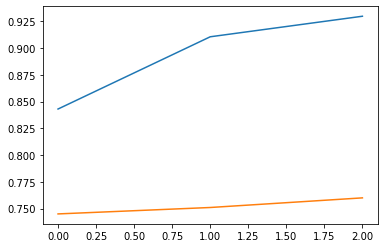

In [ ]:
plt.plot(train_acc_log)
plt.plot(val_acc_log)

In [ ]:
names = ["train", "dev", "test", "dev-b", "test-b"]
datasets = [train, dev, test, dev_b, test_b]
index = []
predictions = []

checkpoint = torch.load(save_path)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()
for name, dataset in zip(names, datasets):
    for idx in tqdm_notebook(range(dataset.shape[0])):
        txt = dataset.iloc[idx]["preprocessed text"]
        encoding = tokenizer.encode_plus(
            txt,
            add_special_tokens=True,
            max_length=MAX_LEN,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids = encoding["input_ids"].to(device)
        attention_mask = encoding["attention_mask"].to(device)
        logits = model(input_ids, attention_mask)
        pred = F.softmax(logits, dim=1).cpu().detach().argmax(1).item()
        pred_str = "neg" if pred == 0 else "pos"
        predictions.append(pred_str)
    
    index.extend([f"{name}/{i}" for i in range(len(dataset))])
results = pd.DataFrame({0: index, 1: predictions})

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
results.to_csv("bert_results.tsv", sep="\t", index=False, header=False)
!zip -FS bert_results.zip bert_results.tsv
!cp -t /content/drive/MyDrive/HW1 bert_results.zip bert_results.tsv

  adding: bert_results.tsv (deflated 82%)


###4.2 Submission to Colab


Upload the file to Codalab. Write below how it compared to scores of your submissions with simpler models in this assignment (LR, FFNN, RNN). 

kundyz_onlabek